## 6.6 Sourcing & Analyzing Time-Series Data-FRED


### Federal Reserve Economic Data (FRED)

#### Gross Domestic product is related to my project as a variable for the US.

#### Data souce: https://data.nasdaq.com/data/FRED-federal-reserve-economic-data?keyword=GDP

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Decomposing Time-Series Data
#### 4. Stationarity Test

### 1. Importing Libraries and Data

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = 'y3ykwq97akZoB1xpFitu'

In [14]:
# Importing the Federal Reserve Economic Data "Gross Domestic product" variable.
data_FRED = quandl.get('FRED/GDP')

In [15]:
#Checking data
data_FRED.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [16]:
data_FRED.shape

(300, 1)

In [17]:
data_FRED.columns

Index(['Value'], dtype='object')

In [18]:
type(data_FRED)

pandas.core.frame.DataFrame

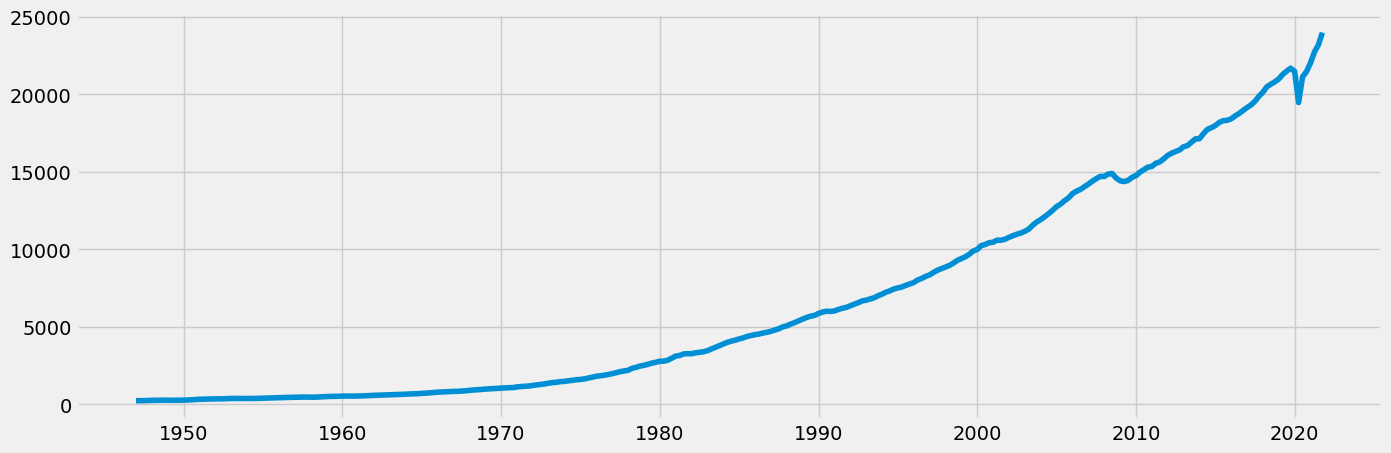

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. 
# When it's set to 100, it will produce lower-than-standard quality, which is useful if, similar to this notebook, 
# you'll have a lot of plots. A large number of plots will increase the size of the notebook, 
# which could take more time to load and eat up a lot of RAM!

plt.plot(data_FRED)

In [20]:
# Check for missing values (you shouldn't have any)
data_FRED.isnull().sum() 

Value    0
dtype: int64

### 2. Data Wrangling

In [21]:
# Resetting index so that you can use the "Date" column as a filter
data_FRED_2 = data_FRED.reset_index()

In [22]:
data_FRED_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [23]:
data_FRED_2

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344


In [33]:
# Producing a subset for data from 2015 (data range of my primary data set) until October of 2021.
# It says on the website that the data has been refreshed on 28 Jan 2022. 
data_FRED_sub = data_FRED_2.loc[(data_FRED_2['Date'] >= '2015-01-01') & (data_FRED_2['Date'] < '2021-10-01')]

In [34]:
data_FRED_sub.shape

(27, 2)

In [35]:
data_FRED_sub

,Date,Value
272,2015-01-01,17991.348
273,2015-04-01,18193.707
274,2015-07-01,18306.960
275,2015-10-01,18332.079
276,2016-01-01,18425.306
277,2016-04-01,18611.617
278,2016-07-01,18775.459
279,2016-10-01,18968.041
280,2017-01-01,19153.912
281,2017-04-01,19322.920


In [36]:
# Setting the "Date" column as the index

from datetime import datetime

data_FRED_sub['datetime'] = pd.to_datetime(data_FRED_sub['Date']) # Create a datetime column from "Date"
data_FRED_sub = data_FRED_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_FRED_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_FRED_sub.head()

,Value
datetime,
2015-01-01,17991.348
2015-04-01,18193.707
2015-07-01,18306.960
2015-10-01,18332.079
2016-01-01,18425.306


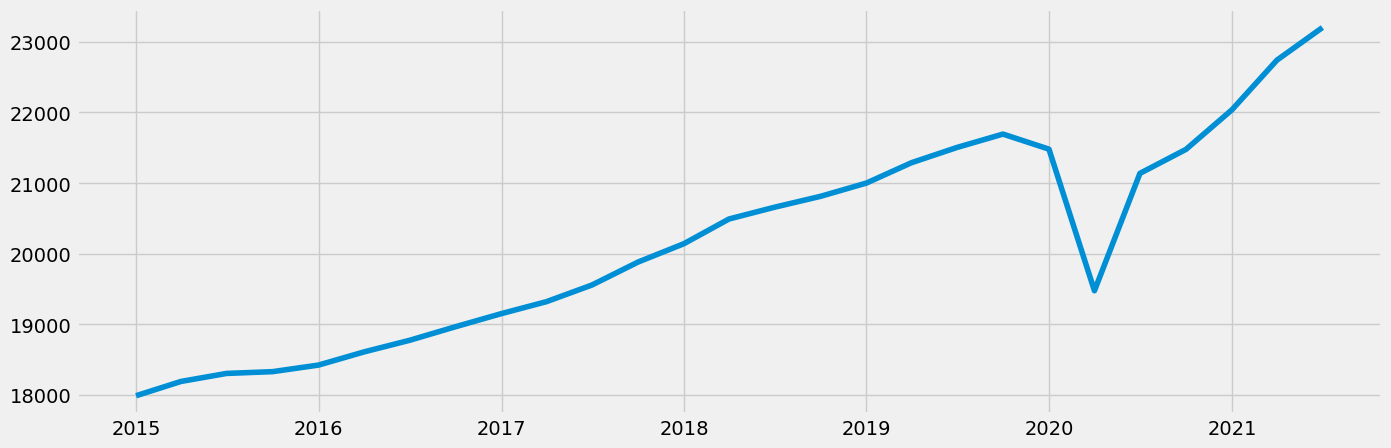

In [37]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_FRED_sub)

### 3. Decomposing Time-Series Data

In [38]:
# Decomposing the time series using an additive model

decomposing = sm.tsa.seasonal_decompose(data_FRED_sub, model='additive')

In [39]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

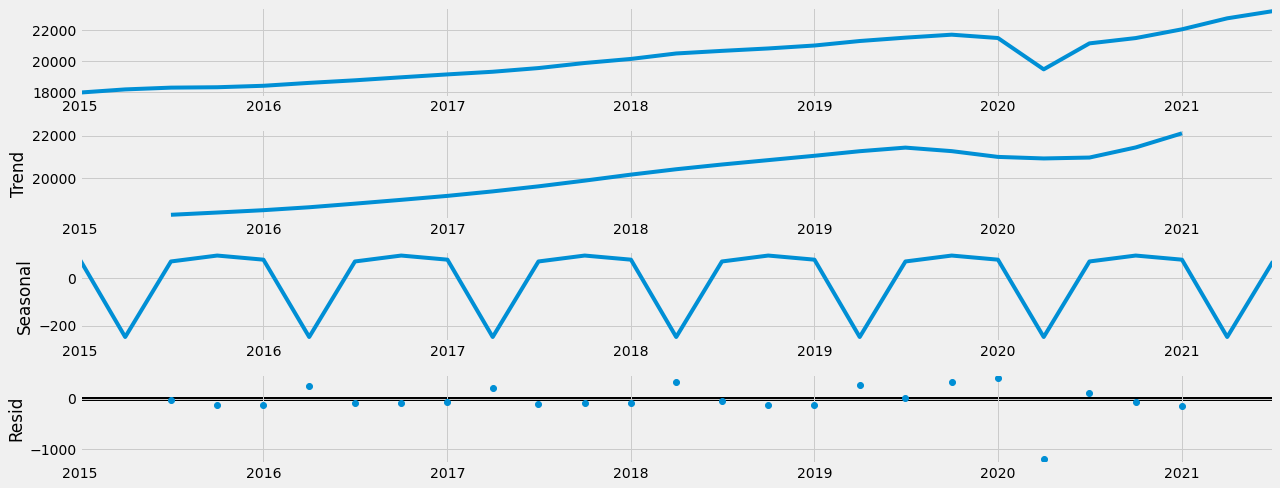

In [40]:
# Plotting the separate components

decomposing.plot()
plt.show()

#### The decomposition shows an upward trend of the median GDP for the period 2015-2021. 

#### The plot shows seasonality due to a pattern repeating itself at the same time each year. GDP falls down in 2d quarter and then grow in 3d quarter after that it stays on a plateau in 4th and 1st quarters.

#### There are some noise due to data fluctuations.

### 4. Stationarity Test

#### Dickey-Fuller Test

In [43]:
 # The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_FRED_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.309970
p-value                         0.168773
Number of Lags Used             7.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


#### In order to determine the results of a statistical hypothesis test, one has to compare the test statistic to the critical value of the corresponding significance level.

#### If the test statistic is larger than the critical value, one can’t reject the null hypothesis. If the test statistic is smaller than the critical value, the null hypothesis could be rejected.

#### In this case, considering a significance level of 5%, the “Critical Value of 5% has a value of-3.031227. This is smaller than the test statistic, which is -2.309970, which means that the null hypothesis cannot be rejected.

#### This also means that the data is non-stationary.

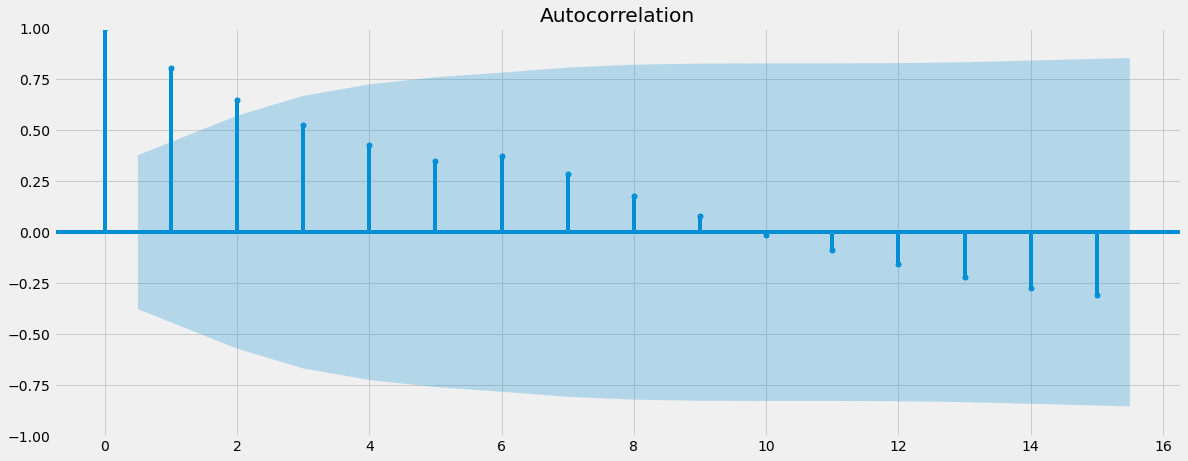

In [44]:
# Checking out autocorrelations with a plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import autocorrelation and partial correlation plots.

plot_acf(data_FRED_sub)
plt.show()

#### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means there are lags that are significantly correlated with each other. Thus, it can be deduced that the data is non-stationary.

#### Stationarizing the data

In [45]:
data_diff = data_FRED_sub - data_FRED_sub.shift(1) # The df.shift(1) function turns the observation to t-1, 
# making the whole data t - (t -1)

In [46]:
data_diff.dropna(inplace = True) # Missing values that came about as a result of the differencing are removed. 
# They need to be removed or the Dickey-Fuller test won't run.

In [47]:
data_diff

,Value
datetime,
2015-04-01,202.359
2015-07-01,113.253
2015-10-01,25.119
2016-01-01,93.227
2016-04-01,186.311
2016-07-01,163.842
2016-10-01,192.582
2017-01-01,185.871
2017-04-01,169.008


In [48]:
data_diff.columns

Index(['Value'], dtype='object')

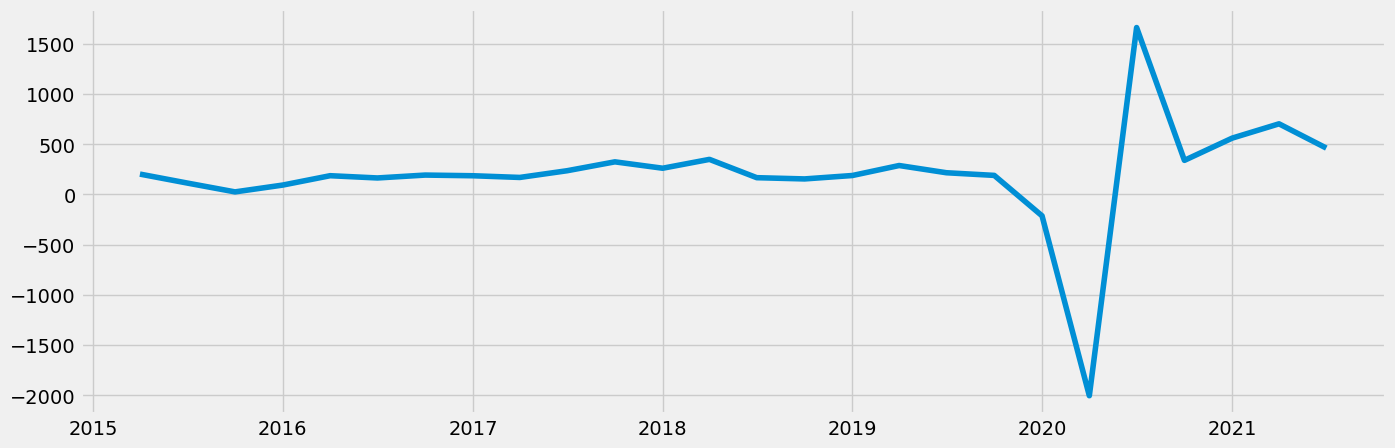

In [49]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

#### The visual patterns are more visible and the data presented trend changes.

In [50]:
# Running the Dickey-Fuller-Test again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.519460
p-value                         0.110811
Number of Lags Used             9.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


####  The data is still non-stationary and the null hypothesis cannot be rejected. 

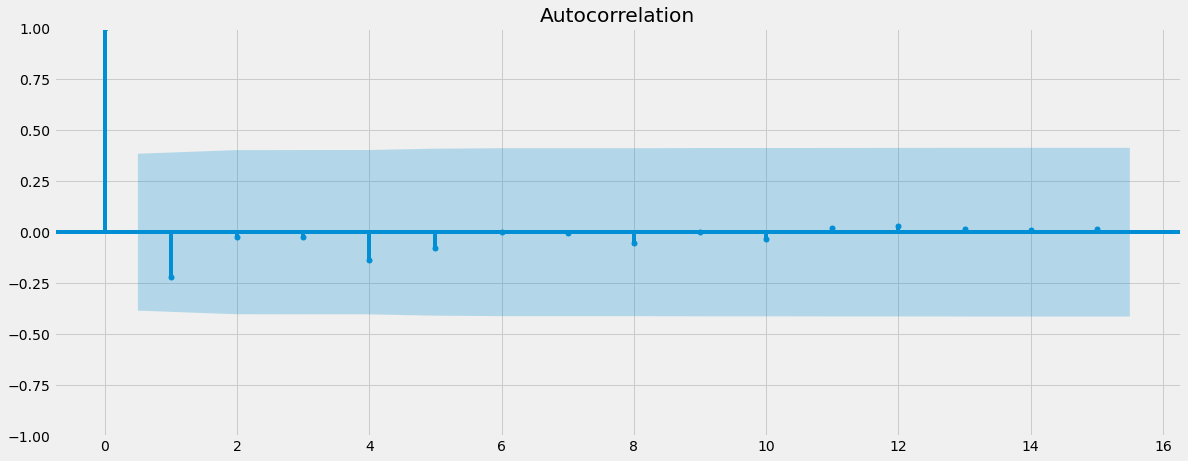

In [58]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

#### The data is still not stationary, the vertical represents the lag in the series. 

In [52]:
data_diff_1 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, 
# making the whole data t - (t -1)

In [53]:
data_diff_1.dropna(inplace = True) # Missing values that came about as a result of the differencing are removed. 
# They need to be removed or the Dickey-Fuller test won't run.

In [54]:
data_diff_1

,Value
datetime,
2015-07-01,-89.106
2015-10-01,-88.134
2016-01-01,68.108
2016-04-01,93.084
2016-07-01,-22.469
2016-10-01,28.740
2017-01-01,-6.711
2017-04-01,-16.863
2017-07-01,66.765


In [55]:
data_diff_1.columns

Index(['Value'], dtype='object')

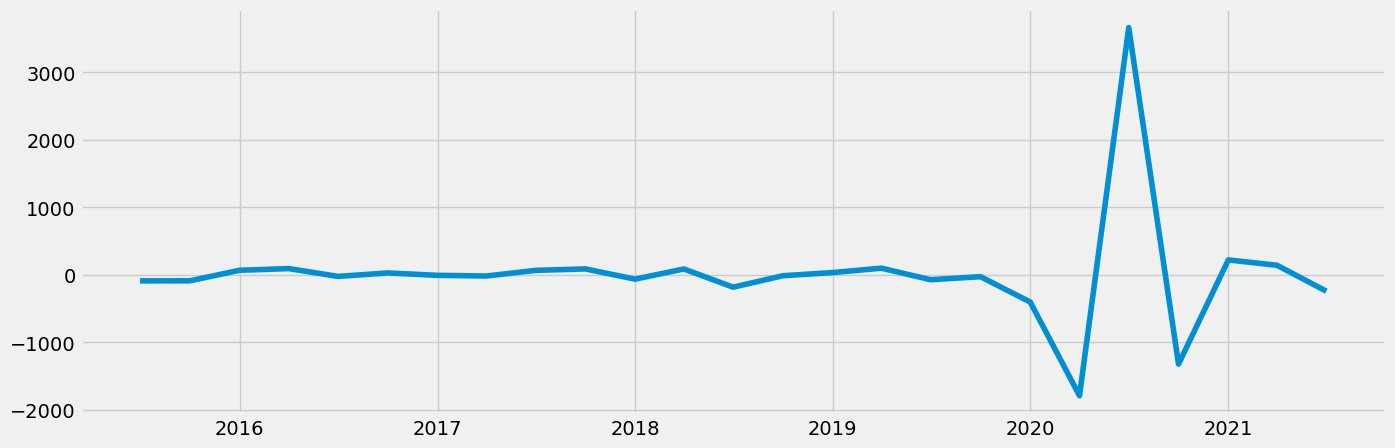

In [56]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [57]:
# Running the Dickey-Fuller-Test again
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.062810
p-value                         0.729673
Number of Lags Used             9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


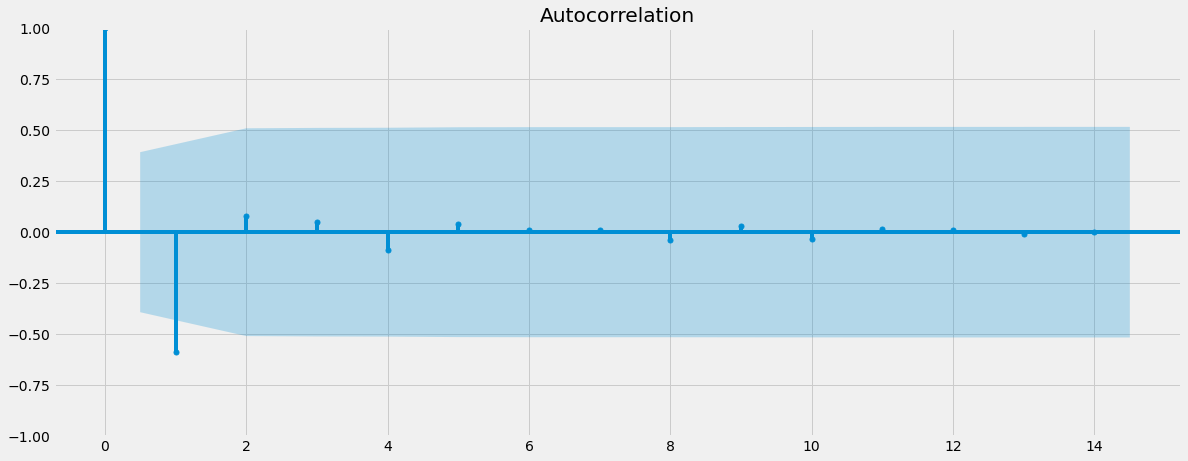

In [59]:
# Plotting the autocorrelation again

plot_acf(data_diff_1)
plt.show()

#### The data is still not stationary. There is no improvement in the autocorrelation. 